# Лабораторная работа 3.4.4. Петля гистерезиса (статистические метод)

## Введение и краткая теория

Ферромагнетики имеют широкое применение в электротехнике и других областях. Поэтому интересно исследовать, как они себя ведут, например, во внешнем магнитном поле.
В данной работе исследуется петля гистерезиса - кривая намагничивания ферромагнетика.

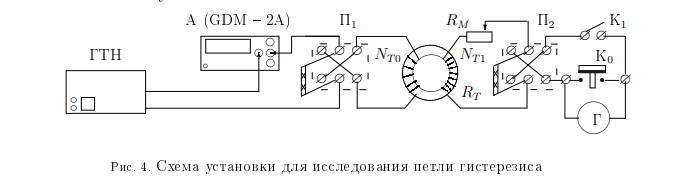

Схема проста, мы меняем ток в намагничивающей обмотке, в связи с чем меняется магнитное поле в тороиде, что создаёт ток в измерительной обмотке, значения которого мы и регистрируем. Но тороид намагничивается сам, и потому к внешнему полю от изменяющегося тока добавляется поле самого тороида, из-за чего и возникает необычная кривая - петля гистерезиса.
Теперь рассмотрим подробнее, как выразить нужные нам величины.

Напряженность магнитного поля $H$ в тороиде зависит от тока, текущего по обмотке по такой формуле:
$H=\normalsize \frac{N_{T_0}}{\pi D}I$ (1)  
В формуле $D$ - средний диаметр тора, $N_{T_0}$ - число витков в намагничивающей обмотке.  
Если ток скачком меняется, то меняется напряженность магнитного поля, что приводит к изменению потока индукции $\Phi$ следствие чего в измерительной обмотке возникает ЭДС индукции: $\mathscr{E} = -\normalsize \frac{d\Phi}{dt} = -S_TN_{T_1}\frac{dB}{dt}$, где $S_T$ - площадь поперечного сечения сердечника, а $N_{T_1}$ - количество витков в измерительной обмотке  
Отброс зайчика гальванометра пропорционален заряду, прошедшему через него: $\varphi =\normalsize \frac{q}{b}$, что, учитывая предыдущую формулу, равно по модулю $|\varphi|=\normalsize \frac{S_TN_{T_1}}{bR}\Delta B$, где $R$ - полное сопротивление цепи, а $b$ - баллистическая постоянная гальванометра.
Чтобы её исключить, проведем аналогичный опыт, но только с катушкой. $B$ и $H$ в соленоиде вязаны линейно, потому. Связь изменения тока с изменением индукции будет просто $\Delta B_C = \frac{\mu_0N_{C_0}}{l_C}\Delta I_1$, где $l_C$ - длина соленоида  
Отклонение зайчика будет вычисляться по аналогичной формуле, как и для случая тороида. Собирая всё вместе, установим связь между отклонением зайчика и изменением индукции:  
$\Delta B = \mu_0 (\frac{d_C}{d_T})^2 \frac{N_{C_0}N_{C_1}}{N_{T_1}l_C} \Delta I_1 \frac{\Delta x}{\Delta x_1}$  (2)  
В формуле $\Delta x_1$ и $\Delta I_1$ - отклонение и скачок тока для соленоида



## Обработка результатов

In [190]:
from math import pi
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
%matplotlib inline

In [191]:
R_m = 100    # Ом, магазин сопротивлений
R_0 = 50     # Ом, сопротивление гальванометра

R_C = 60     # Ом, сопротивление соленоида
l_C = 0.8    # М, длина соленоида
d_C = 0.07   # М, диаметр соленоида
N_C1 = 435   # Число витков намагничивающей обмотки (для соленоида)
N_C0 = 825   # Число витков измерительной обмотки (для соленоида)

D = 0.1      # М, Диаметр тороида
d_T = 0.01   # Диаметр внутреннего сечениятороида

N_T0 = 1750  # Число витков намагничивающей обмотки (для тороида)
N_T1 = 300   # Число витков измерительной обмотки (для тороида)

m_0 = 1.26 * 10**(-6)  # Гн/м, магнитная постоянная

Для начала оформим все данные в виде таблиц

In [192]:
ulgist = pd.read_csv("ulgist.csv")
ulgist = ulgist.T
ulgist.columns = ulgist.iloc[0]
ulgist = ulgist.rename(columns={'delta x, см': '$\delta x$, см', 'delta I, мА': '$\Delta I$, мА', 'dI': 'dI, мА'})
ulgist = ulgist.drop(['N'])

# Приведем все значения таблицы к float
for col in ulgist.columns:
    ulgist[col] = [i if type(i) != type('a') else float('.'.join(i.split(','))) for i in ulgist[col]]
    
for i in range(0,len(ulgist)):
    ulgist['x, см'][i] *= -1
ulgist

N,"I, мА","$\Delta I$, мА","dI, мА","x, см","$\delta x$, см"
1,1460.00,940.00,0.01,-12.8,0.1
2,520.00,269.00,0.01,-11.3,0.1
3,251.00,93.50,0.01,-6.7,0.1
4,157.50,62.27,0.01,-5.1,0.1
5,95.23,28.47,0.01,-6.4,0.1
6,66.76,10.65,0.01,-1.5,0.1
7,56.11,11.54,0.01,-1.7,0.1
8,44.57,5.36,0.01,-1.6,0.1
9,39.21,11.08,0.01,-1.3,0.1
10,28.13,12.75,0.01,-1.6,0.1


In [193]:
blgist = pd.read_csv("dlgist.csv")
blgist = blgist.T
blgist.columns = blgist.iloc[0]
blgist = blgist.rename(columns={'dx, м': '$\delta x$, см', 'delta I, мА': '$\Delta I$, мА'})
blgist = blgist.drop(['N'])

# Приведем все значения таблицы к float
for col in blgist.columns:
    blgist[col] = [i if type(i) != type('a') else float('.'.join(i.split(','))) for i in blgist[col]]

# Смена направления тока
for i in range(0,len(blgist)):
    blgist['I, мА'][i] *= -1
    blgist['x, см'][i] *= -1
blgist

N,"I, мА","$\Delta I$, мА","dI, мА","x, см","$\delta x$, см"
1,-0.00,-15.39,0.01,-5.2,0.1
2,-15.39,-12.75,0.01,-6.4,0.1
3,-28.14,-11.05,0.01,-15.5,0.1
4,-39.19,-5.39,0.01,-12.5,0.1
5,-44.58,-11.52,0.01,-18.3,0.1
6,-56.10,-10.67,0.01,-9.2,0.1
7,-66.77,-28.19,0.01,-16.6,0.1
8,-94.96,-62.39,0.01,-16.6,0.1
9,-157.35,-93.38,0.01,-11.5,0.1
10,-250.73,-269.27,0.01,-14.6,0.1


In [194]:
brgist = pd.read_csv("drgist.csv")
brgist = brgist.T
brgist.columns = brgist.iloc[0]
brgist = brgist.rename(columns={'dx, м': '$\delta x$, см', 'delta I, мА': '$\Delta I$, мА'})
brgist = brgist.drop(['N'])

# Приведем все значения таблицы к float
for col in brgist.columns:
    brgist[col] = [i if type(i) != type('a') else float('.'.join(i.split(','))) for i in brgist[col]]

# Смена направления тока
for i in range(0,len(brgist)):
    brgist['I, мА'][i] *= -1
brgist

N,"I, мА","$\Delta I$, мА","dI, мА","x, см","$\delta x$, см"
1,-1460.0,940.0,0.01,12.5,0.1
2,-520.0,269.0,0.01,9.3,0.1
3,-251.0,93.6,0.01,7.7,0.1
4,-157.4,62.3,0.01,5.4,0.1
5,-95.1,28.3,0.01,3.6,0.1
6,-66.8,10.7,0.01,1.5,0.1
7,-56.1,11.6,0.01,1.3,0.1
8,-44.5,5.3,0.01,0.8,0.1
9,-39.2,11.1,0.01,1.4,0.1
10,-28.1,12.7,0.01,2.0,0.1


In [195]:
urgist = pd.read_csv("urgist.csv")
urgist = urgist.T
urgist.columns = urgist.iloc[0]
urgist = urgist.rename(columns={'dx, м': '$\delta x$, см', 'delta I, мА': '$\Delta I$, мА'})
urgist = urgist.drop(['N'])

# Приведем все значения таблицы к float
for col in urgist.columns:
    urgist[col] = [i if type(i) != type('a') else float('.'.join(i.split(','))) for i in urgist[col]]

urgist

N,"I, мА","$\Delta I$, мА","dI, мА","x, см","$\delta x$, см"
1,28.10,-11.10,0.01,5.2,0.1
2,39.20,11.06,0.01,6.4,0.1
3,28.14,-11.05,0.01,14.7,0.1
4,39.19,-5.39,0.01,9.8,0.1
5,44.58,-11.52,0.01,17.1,0.1
6,56.10,-10.67,0.01,9.0,0.1
7,66.77,-28.19,0.01,16.0,0.1
8,94.96,-62.39,0.01,16.4,0.1
9,157.35,-93.38,0.01,11.4,0.1
10,250.73,-269.27,0.01,14.4,0.1


In [196]:
# Теперь соеденим все таблицы в одну
hysteresis_loop_data = pd.concat([ulgist, blgist, brgist, urgist], sort=False)
hysteresis_loop_data = hysteresis_loop_data.rename(columns={'dI, мА': '$\delta I$, мА'})

In [197]:
# Добавим колонку H - намагничивающее поле (по формуле 1)
hysteresis_loop_data['H, А/м'] = [(0.001 * x * N_T0 / (pi*D)) for x in hysteresis_loop_data['I, мА']]

In [198]:
# Теперь по формуле 2 рассчитаем значение изменения магнитной индукциии
I_max = 1.46  # А
x_max = 0.074  # м
koef = m_0 * (d_C/d_T)**2 * N_C0 * N_C1 * I_max / (N_T1 * l_C * x_max)
hysteresis_loop_data['$\Delta B$, Т'] = [(np.float64(0.01 * x * koef)).round(3) for x in hysteresis_loop_data['x, см']]
hysteresis_loop_data

N,"I, мА","$\Delta I$, мА","$\delta I$, мА","x, см","$\delta x$, см","H, А/м","$\Delta B$, Т"
1,1460.00,940.00,0.01,-12.8,0.1,8132.817592,-0.233
2,520.00,269.00,0.01,-11.3,0.1,2896.619964,-0.206
3,251.00,93.50,0.01,-6.7,0.1,1398.176175,-0.122
4,157.50,62.27,0.01,-5.1,0.1,877.341624,-0.093
5,95.23,28.47,0.01,-6.4,0.1,530.471383,-0.117
6,66.76,10.65,0.01,-1.5,0.1,371.881440,-0.027
7,56.11,11.54,0.01,-1.7,0.1,312.556435,-0.031
8,44.57,5.36,0.01,-1.6,0.1,248.273753,-0.029
9,39.21,11.08,0.01,-1.3,0.1,218.416286,-0.024
10,28.13,12.75,0.01,-1.6,0.1,156.695999,-0.029


In [199]:
# Проинтегрируем значения изменение магнитной индукции, чтобы получить абсолютное значение
q = np.array(hysteresis_loop_data['$\Delta B$, Т'])
q = [i for i in q if ~np.isnan(i)]
mx = sum(q[22::]) / 2
w = []
for i in range(len(q)):
    w.append(mx + sum(q[:i+1:]))
w = np.array(w)

In [200]:
x = np.array(hysteresis_loop_data['H, А/м'])
x = np.array([i for i in x if i != 0])

In [201]:
#теперь обработаем участок начального намагничивания
bgist = pd.read_csv("bgist.csv")
bgist = bgist.T
#ulgist = ulgist.drop([0], axis=1)
bgist.columns = bgist.iloc[0]
bgist = bgist.rename(columns={'dx, м': '$\delta x$, см', 'delta I, мА': '$\Delta I$, мА'})
bgist = bgist.drop(['N'])

# Приведем все значения таблицы к float
for col in bgist.columns:
    bgist[col] = [i if type(i) != type('a') else float('.'.join(i.split(','))) for i in bgist[col]]

# Смена направления тока
#for i in range(0,len(bgist)):
 #   bgist['I, мА'][i] *= -1
bgist

N,"I, мА","$\Delta I$, мА","dI, мА","x, см","dx, см"
1,0.00,15.39,0.01,1.7,0.1
2,15.39,12.71,0.01,3.3,0.1
3,28.10,11.10,0.01,7.0,0.1
4,39.20,5.40,0.01,4.3,0.1
5,44.60,11.50,0.01,9.2,0.1
6,56.10,10.70,0.01,5.9,0.1
7,66.80,28.10,0.01,12.6,0.1
8,94.90,62.40,0.01,15.0,0.1
9,157.30,93.70,0.01,11.4,0.1
10,251.00,269.00,0.01,14.5,0.1


In [202]:
# Добавим колонку H - намагничивающее поле и изменение магнитной индукции B
bgist['H, А/м'] = [(0.001 * x * N_T0 / (pi*D)) for x in bgist['I, мА']]
I_max = 1.46  # А
x_max = 0.074  # м

koef = m_0 * (d_C/d_T)**2 * N_C0 * N_C1 * I_max / (N_T1 * l_C * x_max)
bgist['$\Delta B$, Т'] = [(np.float64(0.01 * x * koef)).round(3) for x in bgist['x, см']]
bgist

N,"I, мА","$\Delta I$, мА","dI, мА","x, см","dx, см","H, А/м","$\Delta B$, Т"
1,0.00,15.39,0.01,1.7,0.1,0.000000,0.031
2,15.39,12.71,0.01,3.3,0.1,85.728810,0.060
3,28.10,11.10,0.01,7.0,0.1,156.528887,0.128
4,39.20,5.40,0.01,4.3,0.1,218.360582,0.078
5,44.60,11.50,0.01,9.2,0.1,248.440866,0.168
6,56.10,10.70,0.01,5.9,0.1,312.500731,0.107
7,66.80,28.10,0.01,12.6,0.1,372.104257,0.230
8,94.90,62.40,0.01,15.0,0.1,528.633143,0.273
9,157.30,93.70,0.01,11.4,0.1,876.227539,0.208
10,251.00,269.00,0.01,14.5,0.1,1398.176175,0.264


In [203]:
q = np.array(bgist['$\Delta B$, Т'])
q = [i for i in q if ~np.isnan(i)]
begin_w = [0]
for i in range(len(q)):
    begin_w.append(sum(q[:i+1:]))
begin_w = np.array(begin_w)

In [204]:
begin_x = np.array(bgist['H, А/м'])

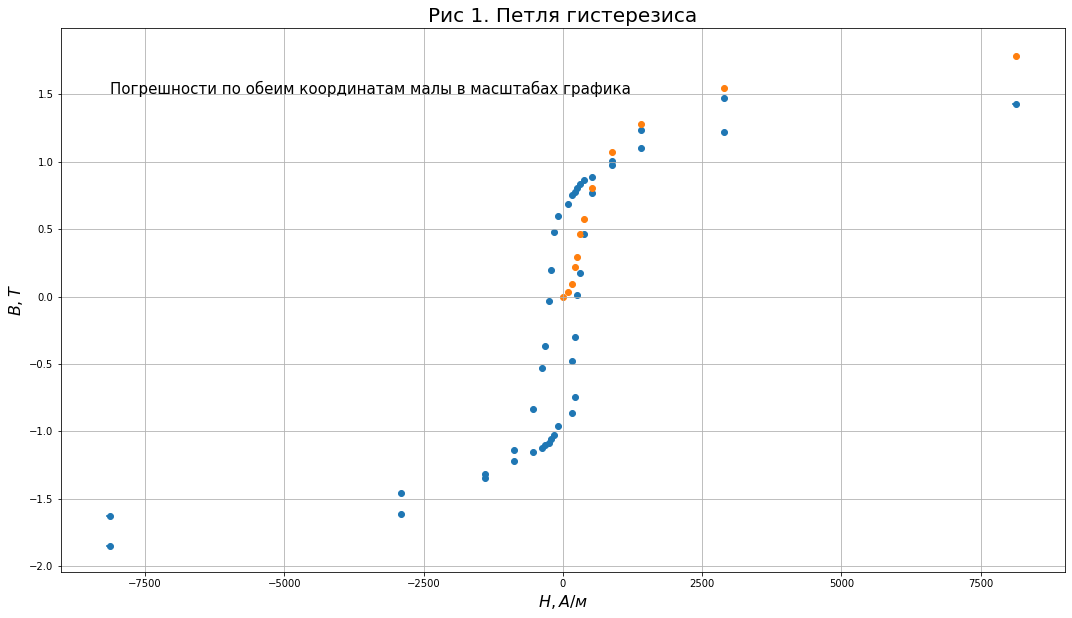

In [205]:
fig = plt.figure(figsize=(18, 10))  # (Размер графика)
plt.title('Рис 1. Петля гистерезиса', fontsize=20)
plt.xlabel('$H, А/м$', fontdict=dict(size=16))
plt.ylabel('$B, T$', fontdict=dict(size=16))
plt.grid(True)  # сетка

# Погрешности
delta_x = np.array(hysteresis_loop_data['x, см'])
delta_x_relative_errors = np.array([0.1/abs(i) for i in delta_x])
delta_x_relative_errors = np.array([i for i in delta_x_relative_errors if ~np.isnan(i) ])
H_errors = np.array([abs(i*j) for i, j in zip(delta_x_relative_errors, x[:-1:])])
H_errors = np.array([i for i in H_errors if ~np.isnan(i)])


delta_I = np.array(hysteresis_loop_data['$\delta I$, мА'])
I = np.array(hysteresis_loop_data['I, мА'])
errors_rel = np.array([i/j if j != 0 else 0.0001 for i,j in zip(delta_I, I)])
errors_rel = np.array([i for i in errors_rel if ~np.isnan(i)])
B_errors = np.array([i*j for i,j in zip(errors_rel, w)])

###############

plt.annotate(
        'Погрешности по обеим координатам малы в масштабах графика',
        xy=(x[6], w[6]),
        xytext=(x[2::].min(), 1.5),
        fontsize=15
    )

plt.scatter(x[:-1:], w)
plt.errorbar(x[:-1:], w, xerr= H_errors, yerr=B_errors, linestyle='None')

plt.scatter(begin_x, begin_w)

plt.show()

In [206]:
# Из графика найдем коэрцитивную силу и индукцию насыщения:
Hc = x[[i for i in range(len(w)) if -0.1 < w[i] and w[i] < 0.1][0]]
Bs = max(w)
Hc_error = H_errors[[i for i in range(len(w)) if -0.1 < w[i] and w[i] < 0.1][0]]
Bs_error = w[-1] * B_errors[-1]
print('Коэрцитивная сила:', Hc.round(0), '±', Hc_error.round(0), 'А/м')
print('Индукция насыщения:', Bs.round(4), '±', Bs_error.round(4), 'T')

Коэрцитивная сила: -248.0 ± 2.0 А/м
Индукция насыщения: 1.47 ± 0.0001 T


In [207]:
# Определим максимальное значение дифференциальной магнитной проницаемости
# Точки для линейной экстраполяции
x_for_extr = begin_x[2:6:]
y_for_extr = begin_w[2:6:]
# Прямая по МНК
A = np.vstack([x_for_extr, np.ones(len(x_for_extr))]).T
a, b = np.linalg.lstsq(A, y_for_extr, rcond=None)[0]
x_extr = np.linspace(0, 2*x_for_extr.max(), 10)
# a - коэффициент наклона прямой, b - свободный член
x_avg = np.average(x_for_extr)
y_avg = np.average(y_for_extr)
x_sqr_avg = np.average([i**2 for i in x_for_extr])
y_sqr_avg = np.average([i**2 for i in y_for_extr])
a_err = (((y_sqr_avg - y_avg**2)/(x_sqr_avg - x_avg**2) - a**2)/len(x_for_extr))**0.5
b_err = a_err * (x_sqr_avg - x_avg**2)**0.5

mu_diff = np.float64(a/m_0)  #Лифференциальная магнитная проницаемость
error_mu_diff = mu_diff*(a_err/a)
print('Максимальное значение дифференциальной магнитной проницаемости:', mu_diff.round(0), '±', error_mu_diff.round(0))

Максимальное значение дифференциальной магнитной проницаемости: 1910.0 ± 63.0


## Результаты и выводы
Мы подтвердили теорию, связанную с ферромагнетиками, и получили значения коэрцитивной силы $H_c$ и индукции насыщения $B_s$. Мы убедились, что такая система обладает свойством гистерезиса.

Лабораторную работу подготовили Илья Ярлыков и Иван Потяшин, группа Б05-814. 04.10.19 03:00